In [20]:
import pandas as pd

data = pd.read_excel("after_extration_data.xlsx")
data01 = pd.DataFrame(data)
data02 = pd.DataFrame(data)
data03 = pd.DataFrame(data)
data04 = pd.DataFrame(data)

In [21]:
data

,Year,BirthRate,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,InterestRate,...,GDI,GDP,GNI,EduExpenditureOfGDP,WeeksPaidLeaveForMothers,TotalLaborParticipationRate,InflationRate,WorkLeisureBalanceIndex,LaborMarketStability,HousingAffordabilityIndex
0,1990,11.8,55.172,1652.679,27.2,5.9,53.930,3.958333,58.583861,8.964167,...,0.940,19473.072125,19561.545708,4.957250,60.0,67.429,3.261872,24.509914,13.624422,23098.466047
1,1991,12.2,55.979,1652.679,27.2,5.7,53.930,3.958333,58.583861,9.463333,...,0.942,20617.579156,20602.091660,5.103220,112.0,67.959,3.337426,24.318766,13.624422,22035.150252
2,1992,12.2,57.604,1652.679,27.3,5.8,54.558,3.958333,58.583861,9.460000,...,0.944,21293.268400,21345.923456,5.296980,112.0,68.839,4.020847,24.007888,13.783075,21572.029041
3,1993,12.0,58.208,1652.679,27.3,5.7,54.281,3.958333,58.583861,7.023334,...,0.945,21732.871184,21793.075303,5.252000,112.0,68.986,3.631786,23.956730,13.713096,21310.688329
4,1994,11.6,61.895,1652.679,27.5,5.5,56.969,4.241667,58.583861,5.117500,...,0.949,22642.841565,22677.856984,5.340175,112.0,71.342,2.953407,23.165583,13.430804,20533.130991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017,8.4,71.674,1727.140,31.2,3.3,53.712,9.225000,117.015000,-0.329050,...,0.987,33044.700150,32269.025353,5.015610,30.1,74.690,1.368614,23.124113,5.822439,36615.542110
476,2018,8.5,72.376,1737.704,31.4,3.3,54.978,7.166667,129.032500,-0.322092,...,0.991,34928.618990,34075.601394,4.675160,30.1,75.145,0.993716,23.124679,7.671348,38177.963261
477,2019,8.4,72.901,1743.930,31.4,3.3,55.422,6.675000,141.882500,-0.356333,...,0.988,37299.182306,36330.275280,4.630020,30.1,75.523,0.338178,23.091376,8.302921,39387.314220
478,2020,8.2,71.790,1611.193,31.6,3.3,54.056,7.116667,154.327500,-0.425150,...,0.992,34955.611560,34411.605571,4.876560,30.1,74.227,-0.012438,21.706293,7.595691,45848.642022


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          480 non-null    int64  
 1   BirthRate                     480 non-null    float64
 2   FemaleLaborParticipationRate  480 non-null    float64
 3   AvgHoursWorked                480 non-null    float64
 4   FirstBirthAge                 480 non-null    float64
 5   MarriageRate                  480 non-null    float64
 6   EmploymentRate                480 non-null    float64
 7   UnemploymentRate              480 non-null    float64
 8   HousingPrice                  480 non-null    float64
 9   InterestRate                  480 non-null    float64
 10  PartTimeRate                  480 non-null    float64
 11  FamilyExpenditure             480 non-null    float64
 12  UnemploymentExpenditure       480 non-null    float64
 13  GDI  

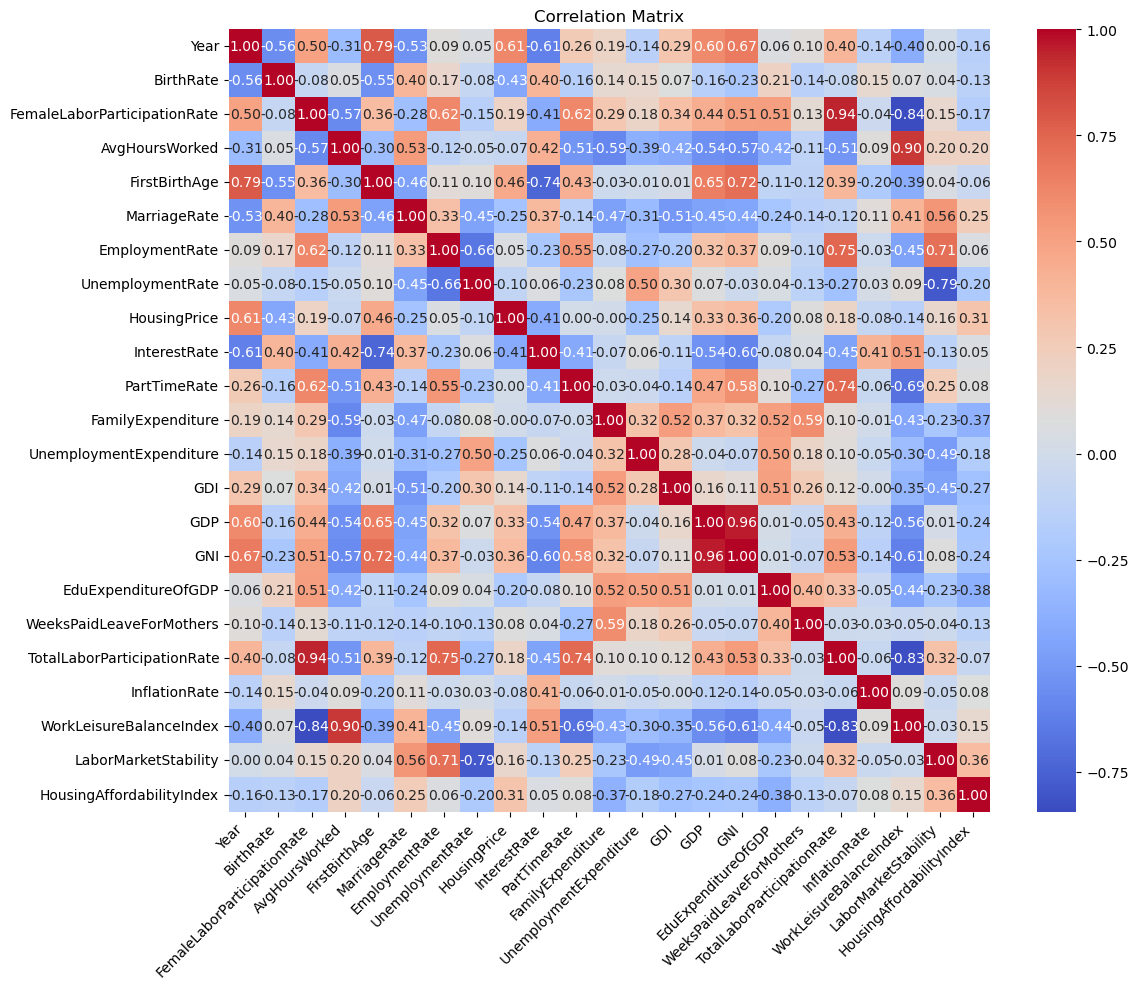

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['Year', 'BirthRate'], axis=1)
y = data['BirthRate']
z = data['Year']

# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state=42)

# RFECV 초기화 - 교차 검증을 사용하여 최적의 특성 수를 찾음
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

# RFECV 수행
rfecv.fit(X, y)

# 중요한 특성 출력
print("Optimal number of features: ", rfecv.n_features_)
print("Best features: ", X.columns[rfecv.support_])

Optimal number of features:  12
Best features:  Index(['FemaleLaborParticipationRate', 'FirstBirthAge', 'MarriageRate',
       'EmploymentRate', 'HousingPrice', 'FamilyExpenditure',
       'UnemploymentExpenditure', 'GDI', 'GNI', 'EduExpenditureOfGDP',
       'WeeksPaidLeaveForMothers', 'HousingAffordabilityIndex'],
      dtype='object')


In [33]:
# 선택된 특성으로 데이터프레임 생성
selected_features = X[X.columns[rfecv.support_]]

# 새로운 데이터프레임과 종속 변수(y)를 합치기
selected_data = pd.concat([selected_features, y, z], axis=1)

# 데이터를 트레이닝과 테스트 세트로 나누기
train_data = selected_data[selected_data['Year'].between(1990, 2018)]
test_data = selected_data[selected_data['Year'].between(2019, 2021)]

# 독립 변수와 종속 변수 분리
X_train = train_data.drop(['Year', 'BirthRate'], axis=1)
y_train = train_data['BirthRate']

X_test = test_data.drop(['Year', 'BirthRate'], axis=1)
y_test = test_data['BirthRate']

# RandomForestRegressor로 모델 초기화
model = RandomForestRegressor()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 모델 성능 평가 (예를 들어, 평균 제곱 오차 사용)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.8591011333333316


In [34]:
# 모델 성능 평가 (R^2 스코어)
from sklearn.metrics import r2_score

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# R^2 스코어 계산
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')


R^2 Score: 0.6238969298719725


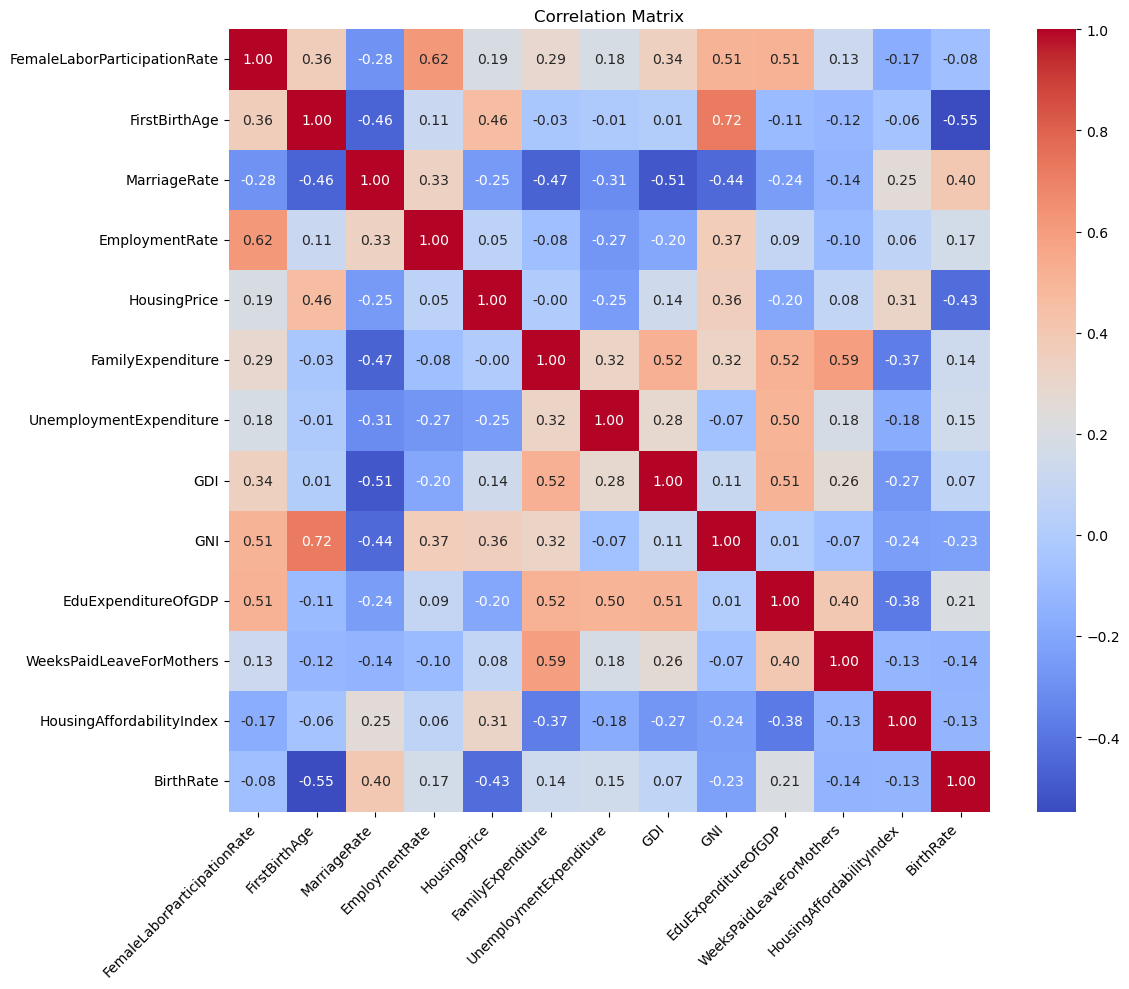

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_data = selected_data.drop('Year', axis=1)
corr_matrix = selected_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
selected_data = pd.concat([selected_data, z], axis=1)
selected_data.to_excel("after_correlation_data.xlsx", index=False)

## 제외

- TotalLaborParticipationRate
- WorkLeisureBalanceIndex
- GNI

## 다양한 데이터셋 생성

- LaborMarkeyStability / Unemployment, Employment
- FirstBirthAge / InterestRate

In [5]:
columns01_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'EmploymentRate', 'UnemploymentRate', 'InterestRate']
data01 = data01.drop(columns=columns01_to_exclude)

In [6]:
columns02_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'EmploymentRate', 'UnemploymentRate', 'FirstBirthAge']
data02 = data02.drop(columns=columns02_to_exclude)

In [7]:
columns03_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'LaborMarketStability', 'InterestRate']
data03 = data03.drop(columns=columns03_to_exclude)

In [8]:
columns04_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'LaborMarketStability', 'FirstBirthAge']
data04 = data04.drop(columns=columns04_to_exclude)

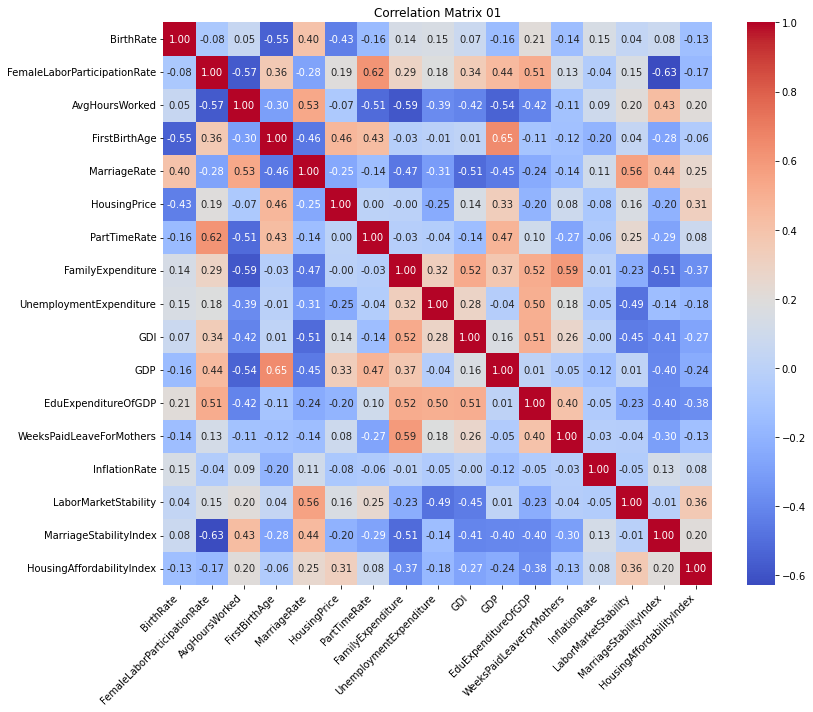

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix01 = data01.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix01, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix01.columns,
            yticklabels=corr_matrix01.columns)
plt.title('Correlation Matrix 01')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

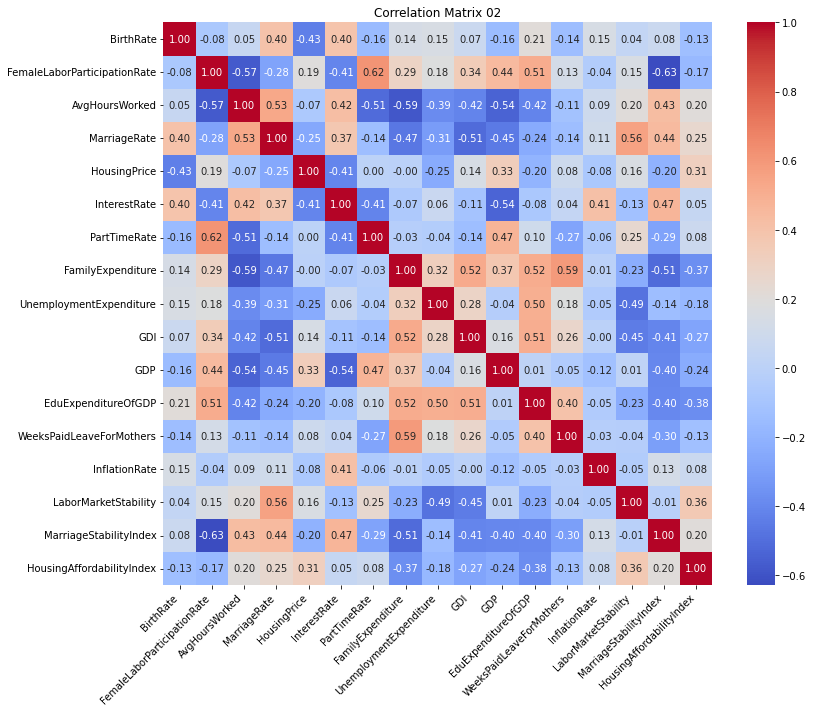

In [69]:
corr_matrix02 = data02.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix02, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix02.columns,
            yticklabels=corr_matrix02.columns)
plt.title('Correlation Matrix 02')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

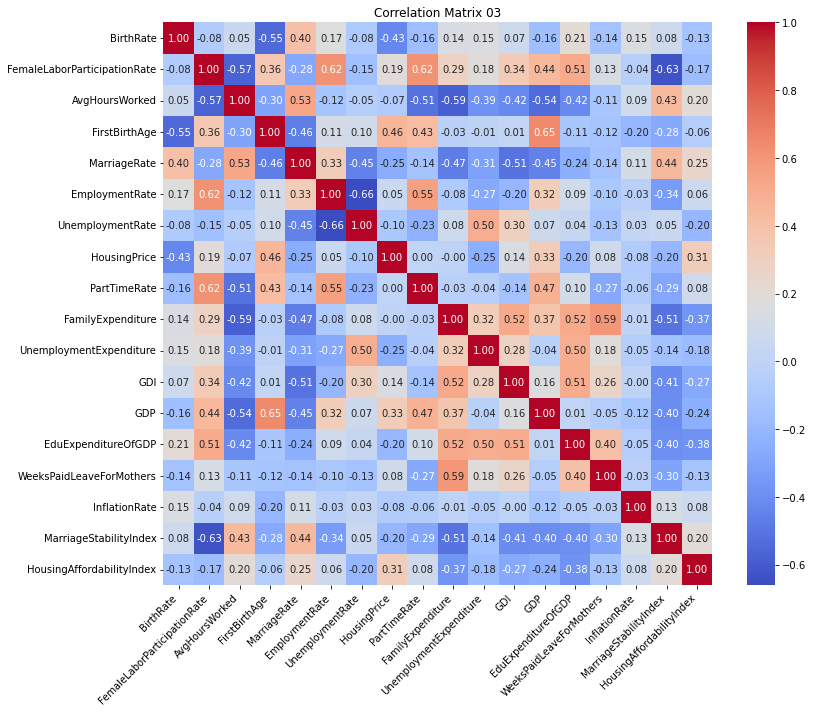

In [70]:
corr_matrix03 = data03.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix03, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix03.columns,
            yticklabels=corr_matrix03.columns)
plt.title('Correlation Matrix 03')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

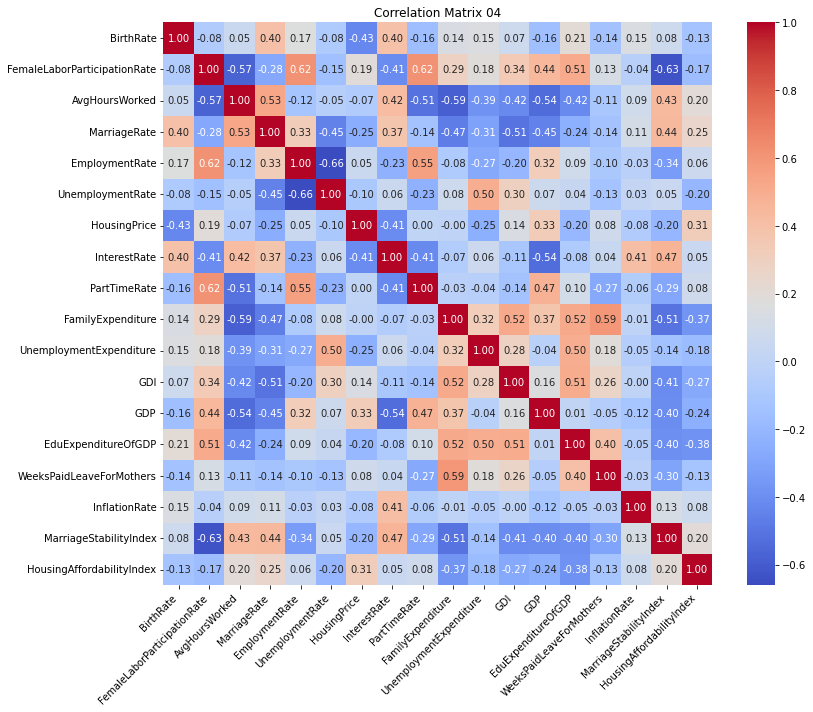

In [71]:
corr_matrix04 = data04.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix04, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix04.columns,
            yticklabels=corr_matrix04.columns)
plt.title('Correlation Matrix 04')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Save the DataFrame to an Excel file
data01.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)
data02.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)
data03.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)
data04.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)